# Dead or alive: cellular automata

Modelling life is hard. In science, when we want to model something complex, we begin by breaking it down into something simpler until it becomes easy enough to us to understand. 

This is the principle behind a *cellular automaton*. A collection of objects (or *cells*) can have each have two possible states: *alive* or *dead*. We model the objects as living on some sort of grid. The objects are then evolved over a series of *timesteps*. At each new timestep, the new state of each cell depends on its previous state and on the states of its immediate neighbors. 

Let's begin by looking at a 1d cellular automaton.

In [18]:
# this is the initial state of the cells
initial_cells = [0, 0, 0, 0, 1, 0, 0, 0, 0]

# this defines the behavior of the automaton. Each entry in the dictionary 
# describes a cell and its two neighbors, and returns the what the new value of the 
# cell should be for each possible state
rules = {(0,0,0): 0, (0,0,1): 1, (0,1,0): 0, (0,1,1): 1, (1,0,0):1, (1,0,1): 0, (1,1,0): 1, (1,1,1): 0}


# evolve the cells through a single step
def step(cells, rules):
    new_cells = [0] * len(cells)
    
    # do the inner cells 
    for i in range(1, len(cells)-1):
        # update the ith cell using the rules dictionary
        # note that I'm casting the list as a tuple 
        # (remember how lists are mutable so we can't use them for indexing?)
        new_cells[i] = rules[tuple(cells[i-1:i+2])]
        
    # we must deal with the first and last cells separately as they do not have both neighbors
    # instead, we shall pretend that the cells wrap around, so the cell at the end becomes the 
    # cell to the left of the first cell, and the first cell becomes the cell to the right of the 
    # last cell
    new_cells[0] = rules[tuple([cells[-1]] + cells[:2])]
    new_cells[-1] = rules[tuple(cells[-2:] + [cells[0]])]
    
    return new_cells

# evolve the cells through n steps
def evolve(cells, rules, nsteps):
    print(cells)
    for i in range(nsteps):
        cells = step(cells, rules)
        print(cells)

In [19]:
evolve(initial_cells, rules, 15)

[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 1, 0, 0, 0]


Take a look at this code and try and see if you can follow what it's doing by comparing the cells at each step (if you don't, ask one of the instructors!). 

For example, look at the central cell in the first row. It starts off as a 1, with 0s on either side. This means that we need to look up the `010` pattern in the `rules` dictionary, which tells us that at the next step the cell should be a 0. Sure enough, if you look at the central cell in the next step, it has now turned into a 0. 

Ok cool. But how does this relate to life? Well you can think of the cells as living things (e.g. bacteria, or maybe even some actual organic cells). Living things need certain things to be alive: food, warmth, oxygen, room to move etc. So we can think of the rules of the automaton as describing these rules. If too many cells are alive in a certain area, then they shall not have enough resources and so they shall die (`111` -> 0). If all cells are dead, then it's not possible for them to spontaneously come back to life (`000` -> 0). However, if the balance is just right (the cell has a single alive neighbor), then the cell shall have enough food and warmth to survive (e.g. `110` -> 1).

## Your project

For this project, you're going to build *The Game of Life*. This is a 2d cellular automaton. It has the following rules:
1. Any live cell with fewer than two live neighbors dies (loneliness)
2. Any live cell with two or three live neighbors lives on to the next generation (stasis)
3. Any live cell with more than three live neighbors dies (overpopulation)
4. Any dead cell with exactly three live neighbors becomes a live cell (birth)

Your project is to write a code that plays the game of life. To give you some hints on how to get started, here is suggested list of functions/bits of code that you could write:
1. Create your grid. This could just be a 2d list or you could be fancy and create a class.
2. Write a function that counts how many alive neighbors a cell has. Make sure your function can deal with cells that are on the edges of the grid! 
3. Write a function (or add this to your previous function) that applies the rules of the game of life. So, given the location of a cell on the grid, it should be able to tell you whether it lives or dies.
4. Write a function that loops over the whole grid to fill a new grid with the states of the cells at the next time step
5. Write a function that evolves the cells through a number of timesteps, printing the state after each step

When you've got your code working, try running it with different grid sizes and different starting configurations. You can read about all the crazy patterns that can be created on the [Game of Life wikipedia page](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life). 

## Advanced improvements

If you manage to get through all of that, then great! This project is not easy, so getting to the point where you have a working game of life would be a very impressive achievement. However, if you do complete all of the above, then here are a few suggestions for extra things you can do:
- Printing out the grid as a load of zeros and ones is not exactly pretty. A nicer way would be to use `imshow` from `matplotlib` (see below). Instead of printing the cells at each timestep, output them using `imshow`.
- Instead of printing out a load of plots one-by-one, we can animate them! Ask one of the instructors for how to do this (or figure it out yourself by reading about `FuncAnimation` [here](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
- We can make things even prettier by introducing *history*. Instead of throwing away the previous state of the cells immediately, we can save them and use them when we plot the cells. Cells that are dead now by were alive 1, 2, 3.... timesteps ago could be plotted as different colors. This will result in the different patterns in the game of life leaving a trail as the system evolves and looks really cool!

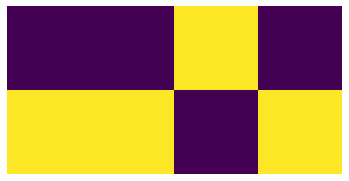

In [35]:
# Use imshow to print a grid

import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow([[0,0,1,0],
            [1,1,0,1]])
plt.axis('off')

img